In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.lines import Line2D
import cmb_anomaly_utils as cau

plt.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rc('legend', facecolor='white', edgecolor='k', framealpha=1)
plt.rcParams['xtick.major.size'] = 3.5
plt.rcParams['ytick.major.size'] = 3.5
plt.rcParams['xtick.labelsize']  = 12
plt.rcParams['ytick.labelsize']  = 12

def custom_save_fig(fig, **kwargs):
    mask_txt = 'masked' if kwargs['is_masked'] else'inpainted'
    fdir     = './output/plots/{}/{}/'.format(mask_txt, kwargs['geom_flag'].lower())
    fdir     = cau.output.ensure_path(fdir)
    fpath    = fdir + '{}_{}_{}_{}_mac'.format(
        mask_txt.lower(),
        kwargs['geom_flag'].lower(),
        kwargs['measure_flag'].lower(),
        kwargs['dir_cap_size'],
    )
    for ftype in ['.png', '.pdf']:
        fig.savefig(fpath + ftype, facecolor=(1,1,1,0), dpi=300, transparent=True)

0.041


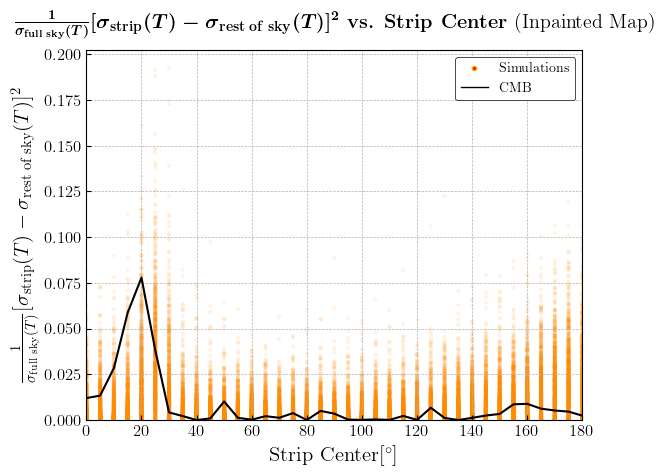

In [16]:
kwargs = {
'base_path':    './output/measure_results_mac_dir/',
'dir_cap_size': 30,
'geom_flag':    cau.const.STRIP_FLAG,
'measure_flag': cau.const.NORM_D_STD2_FLAG,
'is_masked':    False,
'observable':   cau.const.OBS_T,
'tpcf_mode':    cau.const.TPCF_TT,
}
geom_range  = cau.file_reader.read_geom_range_precalc(**kwargs)
cmb_measure = cau.file_reader.read_cmb_precalc(**kwargs)
iter_sims_measure   = cau.file_reader.iter_read_sims_precalc(**kwargs)

argmax   = np.argmax(cmb_measure)
p_value = 0

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # Simulations
    for sim_measure in iter_sims_measure:
        if sim_measure[argmax] > cmb_measure[argmax]:
            p_value += 1
        ax.scatter(geom_range, sim_measure,
                marker='.', edgecolors='none', linewidths=1, c='darkorange', alpha=.1)
    # CMB
    ax.plot(geom_range, cmb_measure, color='k', linewidth=1.5)
    # Labels
    ax.set_xlabel(cau.output.get_xlabel_tex(**kwargs), size=15)
    ax.set_ylabel(cau.output.get_ylabel_tex(**kwargs), size=15)
    ax.set_title(cau.output.get_title_tex(**kwargs), y = 1.04)
    # Limits
    if kwargs.get('geom_flag') == cau.const.CAP_FLAG:
        ax.set_xlim(xmin = 15, xmax = 165)
    else:
        ax.set_xlim(xmin = 0, xmax = 180)
    if kwargs.get('measure_flag') in [cau.const.D_STD2_FLAG, cau.const.NORM_D_STD2_FLAG, cau.const.D_CORR2_FLAG]:
        ax.set_ylim(ymin = 0)
    # ax.set_ylim(ymin = 0, ymax = 1000)
    # Legends
    sample_curves = [
        Line2D([0], [0], ls='none', color='orange', lw=1, marker='.', markerfacecolor='r'),
        Line2D([0], [0], ls='-', color='k', lw=1),
        ]
    ax.legend(sample_curves, [r'Simulations', r'CMB'], loc=1)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    # Save fig
    custom_save_fig(fig, **kwargs)

print(p_value / 1000)
plt.show()

### $A_l$

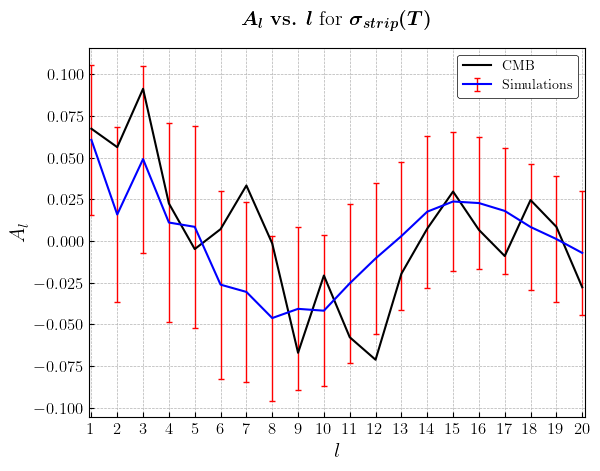

In [23]:
kwargs = {
'base_path':    './output/measure_results_mac_dir/',
'dir_cap_size': 30,
'geom_flag':    cau.const.STRIP_FLAG,
'measure_flag': cau.const.STD_FLAG,
'is_masked':    False,
'observable':   cau.const.OBS_T,
'tpcf_mode':    cau.const.TPCF_TT,
}

plt_mode = 'errorbar' #scatter

cmb_a_l     = cau.file_reader.read_cmb_a_l(**kwargs)
l_range  = np.arange(len(cmb_a_l))
iter_sims_a_l   = cau.file_reader.iter_read_sims_a_l(**kwargs)

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    if plt_mode == 'scatter':
        # Simulations
        for sim_measure in iter_sims_a_l:
            ax.scatter(l_range[1:], sim_measure[1:],
                    marker='.', edgecolors='none', linewidths=1, c='darkorange', alpha=.1)
        # CMB
        ax.plot(l_range[1:], cmb_a_l[1:], color='k', linewidth=1.5)
        # Legends
        sample_curves = [
            Line2D([0], [0], ls='none', color='orange', lw=1, marker='.', markerfacecolor='r'),
            Line2D([0], [0], ls='-', color='k', lw=1),
            ]
        ax.legend(sample_curves, [r'Simulations', r'CMB'], loc=1)
    if plt_mode == 'errorbar':
        # Simulations
        sims_a_l = []
        for sim_measure in iter_sims_a_l:
            sims_a_l.append(sim_measure)
        sims_a_l = np.array(sims_a_l)
        ax.errorbar(l_range[1:], np.mean(sims_a_l, axis=0)[1:], np.std(sims_a_l, axis=0)[1:],
                    color='blue', linewidth=1.5, linestyle='-', label = r'Simulations',
                    ecolor='red', elinewidth=1, capsize = 2)
        # CMB
        ax.plot(l_range[1:], cmb_a_l[1:], color='k', linewidth=1.5, label = r'CMB')
        # Legends
        ax.legend(loc=1)
    # Labels
    ax.set_xlabel(r'$l$', size=15)
    ax.set_ylabel(r'$A_l$', size=15)
    ax.set_title(r'\boldmath{$A_l$} \textbf{vs.} \boldmath{$l$} for $\sigma_{strip}(T)$', y = 1.04)
    ax.set_facecolor('white')
    # Limits
    ax.set_xlim(xmin = 1 - 0.1, xmax = l_range[-1] + 0.1)
    ax.set_xticks(l_range[1:])
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    # Save fig
    fpath = './output/plots/inpainted/strip/a_l_strip_std_{}mac'.format(
        str(int(kwargs['dir_cap_size']))
        )
    fig.savefig(f'{fpath}.pdf', facecolor=(1,1,1,0), dpi=300, transparent=True)
    fig.savefig(f'{fpath}.png', facecolor=(1,1,1,0), dpi=300, transparent=True)
plt.show()